# Mouting to google drive

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Reading CSV file

In [ ]:
import pandas as pd
csv_path = '/content/drive/MyDrive/BanglaSentiment/Bangla/oversampling_increased_final.csv'
df = pd.read_csv(csv_path)

In [ ]:
df.head(10)

,review,category,rating,tag
0,সেলারকে যখনই এসএমএস দিয়েছি সাথে সাথে রেসপন্স ...,Electronics,5,positive
1,পন্যের মান দাম হিসেবে বেশ ভালো। সাধারণত দাম ১ ...,Clothing,5,positive
2,বিসমিল্লাহির রাহমানির রাহিম দারাজ ভাইকে ধন্যবা...,Clothing,5,positive
3,কাপরের মান ভাল না সেলাইয়েরও তেমন ফিনিশিং নাই আ...,Clothing,3,negative
4,ধন্যবাদ সেলার কে ঠিক যেমনটি চেয়েছিলাম তেমনটি ...,Clothing,5,positive
5,ভাল মানের এবং ভাল প্যাকিং। আমি এই দামে সন্তুষ্...,Clothing,4,positive
6,প্রথমে ধন্যবাদ জানাই সেলার ভাইকে এতো সুন্দর এক...,Clothing,5,positive
7,কোয়ালিটি মোটামুটি ভালো। আপনারা চাইলে নিতে পার...,Clothing,4,positive
8,অসাধারণ 🤩 এই প্রজাজ এ বেষ্ট টি-শার্ট ধন্যবাদ ব...,Clothing,5,positive
9,খুবই সুন্দর একটি প্রোডাক্ট আমি এই প্রথম দারাজে...,Clothing,5,positive


Removing extra whitespaces

In [ ]:
df.head(3)

,review,category,rating,tag
0,সেলারকে যখনই এসএমএস দিয়েছি সাথে সাথে রেসপন্স ...,Electronics,5,positive
1,পন্যের মান দাম হিসেবে বেশ ভালো। সাধারণত দাম ১ ...,Clothing,5,positive
2,বিসমিল্লাহির রাহমানির রাহিম দারাজ ভাইকে ধন্যবা...,Clothing,5,positive


In [ ]:
# Function to remove 'x' characters from a sentence\
chars_to_remove = ['।', ',', ';', ':', '?', '!', "'", '.', '"', '-', '[', ']',
                   '{', '}', '(', ')', '—', '―', '~','৳', '#', '$', "'"]
def remove_chars(sentence):
    for char in chars_to_remove:
        sentence = sentence.replace(char, '')
    return sentence
# Apply the function to the 'sentence' column
df['review'] = df['review'].apply(remove_x)

# Display the modified dataframe
df.head(3)

,review,category,rating,tag
0,সেলারকে যখনই এসএমএস দিয়েছি সাথে সাথে রেসপন্স ...,Electronics,5,positive
1,পন্যের মান দাম হিসেবে বেশ ভালো সাধারণত দাম ১ ট...,Clothing,5,positive
2,বিসমিল্লাহির রাহমানির রাহিম দারাজ ভাইকে ধন্যবা...,Clothing,5,positive


In [ ]:
df['tag'] = df['tag'].str.replace('\s', '', regex=True).str.lower()

In [ ]:
df.sample(10)

,review,category,rating,tag
1027,এই রকম বাজে প্রোডাক্ট আমি আমার লাইফে দেখিনাই,Electronics,1,negative
314,চমৎকার একটি ওয়ালেট 💝,Fashion,5,positive
599,ছিঁড়া ফাটা কাপড় দিয়েছে,Clothing,1,negative
304,বিক্রেতা এবং দারাজকে ধন্যবাদ,Fashion,5,positive
335,যেটা ছেয়েছিলাম সেটা দেয়নি আপনাদের এসব কর্মকাণ...,Electronics,1,negative
591,কানে চিমটি দিলাম এরপর থেকে আর জীবনেও দারাজ থেক...,Clothing,1,negative
171,চশমাটির জন্য প্রচুর আগ্রহী ছিলাম যেমন অর্ডার দ...,Fashion,5,positive
1885,মোটামুটি ভালো সাউন্ড কোয়ালিটি অতটা ভালো না চা...,Electronics,3,neutral
1850,দাম অনুযায়ী থেকে ভালো প্রোডাক্ট পাওয়া যাবে ন...,Accessories,4,neutral
1920,মাঝারি মানের জুতা সেলাই করে নিলে হয়তো কিছুদি...,Clothing,3,neutral


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2092 entries, 0 to 2091
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   review    2092 non-null   object
 1   category  2091 non-null   object
 2   rating    2092 non-null   int64 
 3   tag       2092 non-null   object
dtypes: int64(1), object(3)
memory usage: 65.5+ KB


In [ ]:
df.describe()

,rating
count,2092.000000
mean,3.690727
std,1.633418
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
prev = len(df)
print(prev)
df.dropna(axis=0, how="any", inplace=True)

2092


removing small reviews

In [ ]:
prev = len(df)
print(prev)
df = df[df['review'].apply(lambda x: len(x.split()) >= 4)]
now = len(df)
print(f"dropped {prev-now} rows")

2091
dropped 166 rows


In [ ]:
df.sample(10)

,review,category,rating,tag
1010,যথেষ্ট বড় সাউন্ড বক্স,Electronics,1,negative
878,দারাজকে বলছি ব্যাবসা করবেন সত্যতার সাথে করবেন ...,Clothing,5,negative
877,আপনারা যারা কিনতে চান তারা প্লিজ দারাজ থেকে কো...,Clothing,5,negative
845,ভাবছিলাম যে সোলটা রাবার এর হবে কিন্তু না ওইযে ...,Clothing,5,negative
1867,দাম হিসেবে মোটামুটি ভালোকিন্ত সাইজ টা একটু বড় ...,Electronics,5,neutral
1714,ফালতু প্রোডাক্ট কেউ নিবেন না,Accessories,5,negative
1439,কি ছিলো ভাই এইটা? ছবির সাথে প্রোডাক্টের মিল কই...,Fashion,3,negative
239,ফালতু পণ্য কেউ নিবেন না,Fashion,1,negative
1715,টাকা দিয়ে এই ব্যাগ কেনা বোকামি 😥 এই ব্যাগ ক্...,Fashion,1,negative
2059,মোটামুটি তেমন বেশি ভালোনাবলা হয়েছে লেলিন কাপড়ে...,Clothing,5,neutral


In [ ]:
# !pip install bltk

In [ ]:
# from bltk.langtools import remove_stopwords
# from bltk.langtools import Tokenizer

# tokenizer = Tokenizer()

# text = "আমি জানি আমার এই লেখাটির জন্য আমাকে অনেক গালমন্দ শুনতে হবে, তারপরেও লিখছি। " \
#        "লিখে খুব কাজ হয় সে রকম উদাহরণ আমার হাতে খুব বেশী নেই কিন্তু অন্তত নিজের ভেতরের ক্ষোভটুকু বের করা " \
#        "যায় সেটাই আমার জন্যে অনেক।"

# tokened_words = tokenizer.word_tokenizer(text)

# print(f"Len of words: {len(tokened_words)}")
# print(f"After soft elimination: {(remove_stopwords(tokened_words))}")
# print(f"Length after soft elimination: {len(remove_stopwords(tokened_words))}")
# print(f"After moderate elimination: {(remove_stopwords(tokened_words, level='moderate'))}")
# print(f"Length after moderate elimination: {len(remove_stopwords(tokened_words, level='moderate'))}")
# print(f"After hard elimination: {(remove_stopwords(tokened_words, level='hard'))}")
# print(f"Length after hard elimination: {len(remove_stopwords(tokened_words, level='hard'))}")

# Dataset info

In [ ]:
print("Total Reviews:",len(df),
      "\nTotal Positive Reviews:",len(df[df.tag =='positive']),
      "\nTotal Negative Reviews:",len(df[df.tag=='negative']),
      "\nTotal Neutral Reviews:",len(df[df.tag =='neutral']))

Total Reviews: 1925 
Total Positive Reviews: 878 
Total Negative Reviews: 570 
Total Neutral Reviews: 477


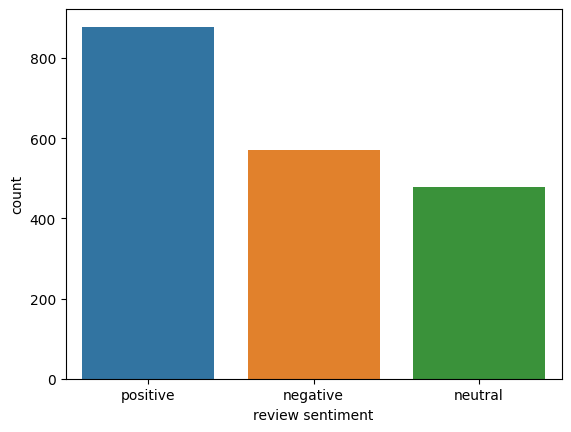

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

class_names = ['positive', 'negative', 'neutral']
ax = sns.countplot(x='tag', data=df)
plt.xlabel('review sentiment')
ax.set_xticklabels(class_names);

In [ ]:
# ax = sns.countplot(x='category', data=df)
# plt.xlabel('Product Category')

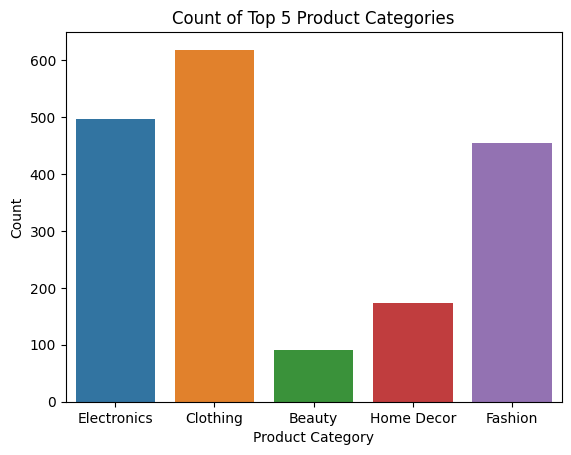

In [ ]:
# Step 1: Calculate the frequency of each category and select the top 5 categories
top_categories = df['category'].value_counts().nlargest(5).index

# Step 2: Filter the data to include only the top 5 categories
filtered_df = df[df['category'].isin(top_categories)]

# Step 3: Create a countplot using seaborn
ax = sns.countplot(data=filtered_df, x='category')

# Optional: Add labels and title to the plot
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Count of Top 5 Product Categories')

# Display the plot
plt.show()

In [ ]:
# Get the total number of categories
total_categories = df['category'].nunique()

# Print the total number of categories
print("Total number of categories:", total_categories)

Total number of categories: 11


Text(0.5, 0, 'Rating distribution')

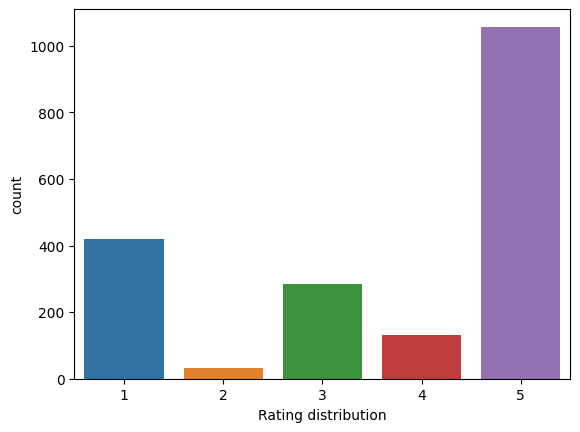

In [ ]:
ax = sns.countplot(x='rating', data=df)
plt.xlabel('Rating distribution')

# Word Summary

In [ ]:
import numpy as np

def data_summary(dataset):

    """
    This function will print the summary of the reviews and words distribution in the dataset.

    Args:
        dataset: list of cleaned sentences

    Returns:
        Number of documnets per class: int
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.review) for word in t.strip().split()]
    class_label= [k for k,v in dataset.tag.value_counts().to_dict().items()]
  # find word list
    for label in class_label:
        word_list = [word.strip().lower() for t in list(dataset[dataset.tag==label].review) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per classfor txt in df.review:
        documents.append(len(list(dataset[dataset.tag==label].review)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class
        u_words.append(len(np.unique(word_list)))

        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.tag==label].review))))
        print("Number of Words:{}".format(len(word_list)))
        print("Number of Unique Words:{}".format(len(np.unique(word_list))))
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))

    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(df)


Class Name :  positive
Number of Documents:878
Number of Words:11173
Number of Unique Words:2366
Most Frequent Words:

ভালো	499
অনেক	308
ধন্যবাদ	211
সুন্দর	188
নিতে	187
পারেন	174
খুব	158
প্রোডাক্ট	140
দাম	121
সেলার	117

Class Name :  negative
Number of Documents:570
Number of Words:8274
Number of Unique Words:2411
Most Frequent Words:

না	243
বাজে	104
করে	88
আমি	81
ভালো	81
আর	79
প্রোডাক্ট	77
একটা	71
এই	68
এর	66

Class Name :  neutral
Number of Documents:477
Number of Words:5712
Number of Unique Words:709
Most Frequent Words:

ভালো	261
না	195
মোটামুটি	192
দাম	117
তবে	114
একটু	90
কিন্তু	72
আশা	69
আরও	63
বেশি	63
Total Number of Unique Words:4172


In [ ]:
df.sample(10)

,review,category,rating,tag
258,খুব ভালো পণ্য সব ঠিক আছে,Fashion,3,positive
446,এক কথায় অসাধারণ জিনিস দেখতে ছোট হলেও সাউন্ড ক...,Electronics,5,positive
1957,কালার টা কালো হলে আরো ভালো হতো,Electronics,5,neutral
321,এক কথায় বেষ্ট প্রোডাক্ট,Fashion,5,positive
1893,প্রোডাক্ট চলে চার্জ একটু কম থাকে,Electronics,3,neutral
1285,যে রকম চাইছিলাম এই রকম পাই নাই ব্লুটুথ কানেক্ট...,Electronics,1,negative
1932,মোটামুটি তেমন ভালো না,Clothing,4,neutral
1400,সত্যিই অসাধারণ.. তবে দাম একটু বেশি মনে হইছে......,Fashion,5,positive
1825,এই বাজেট এর মধ্যে মোটামুটি ভালো,Electronics,4,neutral
518,আলহামদুলিল্লাহ্ অনেক ভালো আপনার চাইলে নিতে পারেন,Clothing,5,positive


Class Name :  positive
Number of Documents:505
Number of Words:5052
Number of Unique Words:1493
Most Frequent Words:

ভালো	223
অনেক	135
ধন্যবাদ	94
নিতে	94
খুব	78
প্রোডাক্ট	63
দাম	62
সুন্দর	58
পারেন	55
সেলার	51
দারাজ	51
এবং	46
ঠিক	41
ভাল	41
আলহামদুলিল্লাহ	40
আপনারা	39
টা	36
ডেলিভারি	35
এই	35
আমার	35

Class Name :  negative
Number of Documents:315
Number of Words:3899
Number of Unique Words:1607
Most Frequent Words:

না	73
আমি	50
কিন্তু	37
থেকে	36
আর	35
এই	35
এর	33
বাজে	33
একটা	31
প্রোডাক্ট	31
করে	30
ভালো	30
খারাপ	27
না।	26
আমার	24
দারাজ	24
সাউন্ড	24
খুব	23
খুবই	22
অনেক	21

Class Name :  neutral
Number of Documents:121
Number of Words:1298
Number of Unique Words:645
Most Frequent Words:

ভালো	54
কিন্তু	30
দাম	22
বেশি	17
তবে	17
না	16
সাউন্ড	16
মোটামুটি	15
একটু	15
টা	14
আছে	13
মনে	11
ঠিক	11
অনেক	10
সব	9
কালার	9
ভাল	9
সুন্দর	9
ছিল	9
আর	8
Total Number of Unique Words:2864

In [ ]:
df.dropna(axis=0, how="any", inplace=True)

In [ ]:
df.to_csv("/content/drive/MyDrive/BanglaSentiment/Bangla/cleaned.csv", index=False)